In [1]:
%pip install tensorflow opencv-python matplotlib kagglehub pandas tensorflow_hub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreelakshmigp/cedardataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Satgu\.cache\kagglehub\datasets\shreelakshmigp\cedardataset\versions\1


In [3]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load Data

In [5]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path, "signatures"), batch_size=128)

Found 2640 files belonging to 2 classes.


Pre Processing

In [6]:
data = data.map(lambda x,y: (x/255, y))

In [7]:
scaled_iterator = data.as_numpy_iterator()

In [8]:
batch = scaled_iterator.next()

In [9]:
batch[1].max()

np.int32(1)

(array([[[[0.9338993 , 0.9338993 , 0.9338993 ],
         [0.9205137 , 0.9205137 , 0.9205137 ],
         [0.91021204, 0.91021204, 0.91021204],
         ...,
         [0.9435536 , 0.9435536 , 0.9435536 ],
         [0.9466376 , 0.9466376 , 0.9466376 ],
         [0.95016766, 0.95016766, 0.95016766]],

        [[0.9401171 , 0.9401171 , 0.9401171 ],
         [0.94254905, 0.94254905, 0.94254905],
         [0.93422514, 0.93422514, 0.93422514],
         ...,
         [0.93549937, 0.93549937, 0.93549937],
         [0.9391781 , 0.9391781 , 0.9391781 ],
         [0.93934566, 0.93934566, 0.93934566]],

        [[0.93380535, 0.93380535, 0.93380535],
         [0.9453453 , 0.9453453 , 0.9453453 ],
         [0.9462832 , 0.9462832 , 0.9462832 ],
         ...,
         [0.9499689 , 0.9499689 , 0.9499689 ],
         [0.925432  , 0.925432  , 0.925432  ],
         [0.93805915, 0.93805915, 0.93805915]],

        ...,

        [[0.93313634, 0.93313634, 0.93313634],
         [0.93783975, 0.93783975, 0.93783975

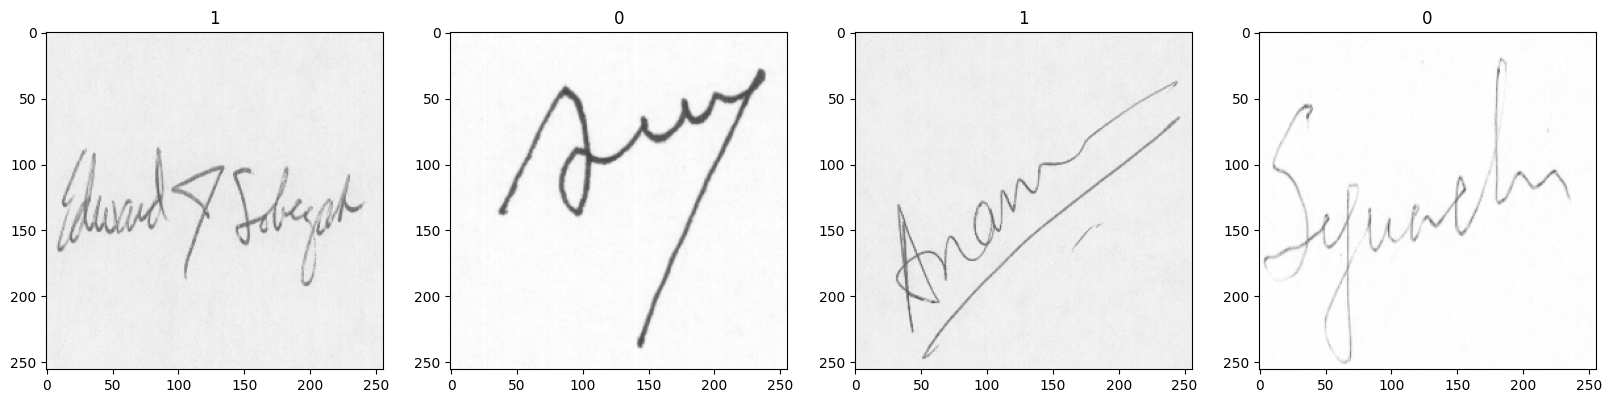

In [18]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    print(batch)

Test Train Split

In [21]:
len(data)

21

In [22]:
train_size = int(0.6*len(data))
test_size = int(0.3*len(data))
val_size = int(0.1*len(data))+1
print(train_size, test_size, val_size)

12 6 3


In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Satgu\Documents\VS Code\AI\Forgery Classifier (CNN)\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [30]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5620 - loss: 0.9087 - val_accuracy: 0.5208 - val_loss: 0.6875
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 968ms/step - accuracy: 0.5100 - loss: 0.6910 - val_accuracy: 0.5052 - val_loss: 0.6828
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 922ms/step - accuracy: 0.5744 - loss: 0.6706 - val_accuracy: 0.5286 - val_loss: 0.6780
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6642 - loss: 0.6167 - val_accuracy: 0.7422 - val_loss: 0.5611
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 918ms/step - accuracy: 0.6708 - loss: 0.6015 - val_accuracy: 0.7135 - val_loss: 0.5638
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 840ms/step - accuracy: 0.7246 - loss: 0.5383 - val_accuracy: 0.7734 - val_loss: 0.5039
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 842ms/step - accuracy: 0.7470 - loss: 0.5067 - val_accuracy: 0.7682 - val_loss: 0.4965
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 859ms/step - accuracy: 0.8066 - loss: 0.4417 - val_accuracy: 

In [31]:
hist.history

{'accuracy': [0.5455729365348816,
  0.5338541865348816,
  0.609375,
  0.6809895634651184,
  0.6927083134651184,
  0.73046875,
  0.7584635615348816,
  0.7864583134651184,
  0.8157551884651184,
  0.830078125,
  0.828125,
  0.85546875,
  0.8483073115348816,
  0.8385416865348816,
  0.8444010615348816,
  0.8756510615348816,
  0.8938801884651184,
  0.9205729365348816,
  0.9205729365348816,
  0.9654948115348816],
 'loss': [0.8100154399871826,
  0.6880970597267151,
  0.661722719669342,
  0.6083748936653137,
  0.5800369381904602,
  0.5397623777389526,
  0.4982454776763916,
  0.4613666236400604,
  0.4238795042037964,
  0.3970908224582672,
  0.3858385980129242,
  0.3487231433391571,
  0.3426417410373688,
  0.3672095537185669,
  0.3826381266117096,
  0.2935287058353424,
  0.2469780594110489,
  0.21859820187091827,
  0.18769223988056183,
  0.1240491271018982],
 'val_accuracy': [0.5208333134651184,
  0.5052083134651184,
  0.5286458134651184,
  0.7421875,
  0.7135416865348816,
  0.7734375,
  0.768229

Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

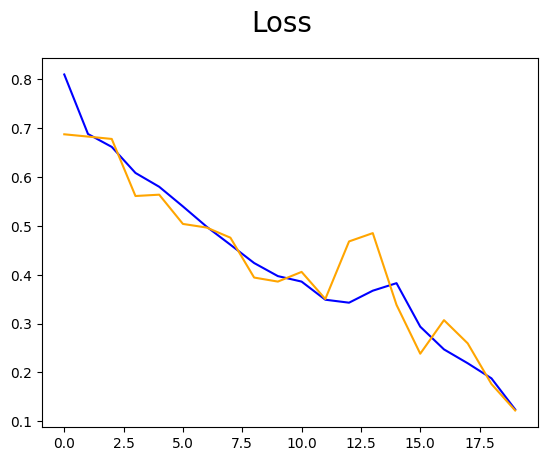

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.show

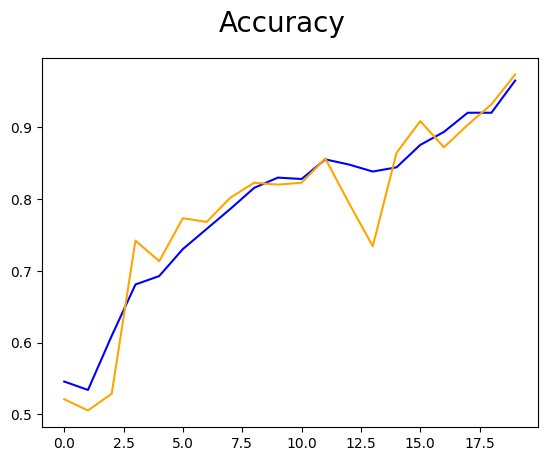

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()

Performance Evaluation

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
precision = Precision()
recall = Recall()
Baccuracy = BinaryAccuracy()

In [36]:
len(test)

6

In [37]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    Baccuracy.update_state(y, yhat)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [38]:
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", Baccuracy.result().numpy())

Precision:  0.94186044
Recall:  0.94736844
Accuracy:  0.94722223


Saving model

In [39]:
model.save(os.path.join('models', 'forgeryclassifier.keras'))

In [40]:
path = "Files/val_data"
val.save(path)

Using the Model

In [41]:
from tensorflow.keras.models import load_model
import os

In [42]:
loaded_model = load_model(os.path.join('models', 'forgeryclassifier.keras'))

In [43]:
forged_example = cv2.imread('forgeries_1_14.png')
forged_example = tf.image.resize(forged_example, (256, 256))
loaded_model.predict(np.expand_dims(forged_example/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.3364882]], dtype=float32)

In [44]:
original_example = cv2.imread('original_3_6.png')
original_example = tf.image.resize(original_example, (256, 256))
loaded_model.predict(np.expand_dims(original_example/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.97115386]], dtype=float32)

Testing against NST Forgeries

In [45]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import os

In [46]:
path = "Files/forged_data"

NSTdata = tf.data.Dataset.load(path)

In [47]:
precision = Precision()
recall = Recall()
Baccuracy = BinaryAccuracy()

In [48]:

for X in NSTdata:
    y = 1
    yhat = model.predict(X)
    print(yhat)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    Baccuracy.update_state(y, yhat)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step

c:\Users\Satgu\Documents\VS Code\AI\Forgery Classifier (CNN)\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 256, 256, 3))', 'Tensor(shape=(32,))')
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
[[2.41862796e-03]
 [7.92870641e-01]
 [9.36424613e-01]
 [9.89637017e-01]
 [1.70601413e-01]
 [2.79274420e-03]
 [3.48800374e-03]
 [3.11231285e-01]
 [2.50725025e-05]
 [9.41981792e-01]
 [9.85255003e-01]
 [1.88833941e-02]
 [9.94812965e-01]
 [1.02831814e-02]
 [9.53657866e-01]
 [7.32417554e-02]
 [1.64924972e-02]
 [4.32163151e-03]
 [2.95472860e-01]
 [7.78152704e-01]
 [3.01509559e-01]
 [3.68888788e-02]
 [9.59150374e-01]
 [7.60441065e-01]
 [6.17133046e-05]
 [6.92962762e-03]
 [2.34880641e-01]
 [9.54396546e-01]
 [2.73483574e-01]
 [9.99716759e-01]
 [4.59202044e-02]
 [2.45404541e-01]
 [9.98737752e-01]
 [1.60182812e-04]
 [2.54488084e-02]
 [1.01854485e-02]
 [2.15271655e-02]
 [9.91977572e-01]
 [1.00000000e+00]
 [3.27219009e-01]
 [8.22947454e-03]
 [4.38260660e-03]
 [9.85936761e-01]
 [9.76375956e-03]
 [1.51940994e-03]
 [4.63554682e-03]
 [1.79200284e-02]
 [9.99058723e-01]
 [9.99156415e-01]
 [5.90120912e-01]
 [2.11160585e-01]
 [9.84825075e-01]
 [4.10620600e-01]
 [4.1618

In [49]:
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", Baccuracy.result().numpy())

Precision:  1.0
Recall:  0.46354166
Accuracy:  0.46354166
